## Regression Mini Lab

The aim of this lab is to gain a better understanding of the impact regularization has on the performance of models.

In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import Math, display
from sklearn.linear_model import (
    LinearRegression,
    SGDRegressor,
    Ridge,
    Lasso
)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Generate the "data"

The values of our input are randomly sampled from a normal distribution, which is often used to describe bell-shaped processes which tends towards central values with tails that quickly fall off.

The values we are trying to predict will be a cosine transformation of the inputs, with a slight slope so as to break the symmetry, and some additional normally distributed noise 

In [2]:
def gen_func(x, noise=0.):
    return 0.15*x + np.cos(x*np.pi/2.) + scipy.stats.norm.rvs(size=len(x), random_state=2)*noise

n = 1000
f_train = 0.9
x = scipy.stats.norm.rvs(loc=0, scale=0.8, size=n, random_state=3)
y = gen_func(x, noise=0.2)

n_train = int(f_train*n)
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]
x_grid = np.linspace(-4, 4, 101)

## Learn the function

We will try to learn the relationship between the inputs and the values using polynomial regression without regression, using lasso, and using ridge.

Since the cosine is a complicated function to learn, we will have to use a high-order polynomial to describe it.

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fit R^2 = 0.89, prediction MSE = 0.03327


<IPython.core.display.Math object>

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Fit R^2 = 0.89, prediction MSE = 0.03351


<IPython.core.display.Math object>

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Fit R^2 = 0.89, prediction MSE = 0.03343


<IPython.core.display.Math object>

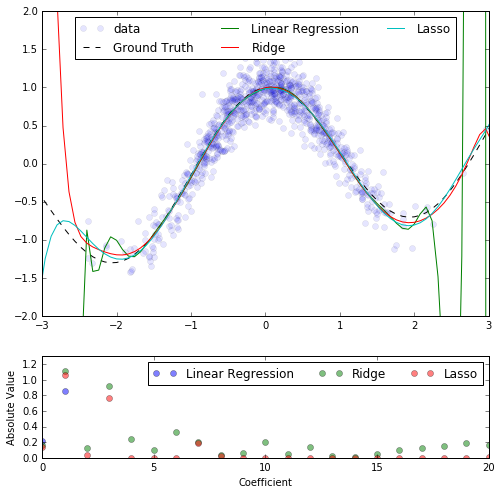

In [3]:
# Set the order of the polynomial fit
n_poly = 22

fig, axs = plt.subplots(2, 1, figsize=(8,8), gridspec_kw={'height_ratios':[3, 1]})
axs = np.ravel(axs)

ax = axs[0]
ax.plot(x_train, y_train, 'o', alpha=0.1, label='data')
ax.plot(x_grid, gen_func(x_grid, noise=0), 'k--', label='Ground Truth')

# Fit the data using three regression methods
for clf, label in (
    (LinearRegression(), 'Linear Regression'),
    (Ridge(alpha=0.01), 'Ridge'),
    (Lasso(alpha=0.0005), 'Lasso'),
    
):

    print '-='*20
    print clf

    # The raw transformation of inputs can result in a large range of values.
    # Use a scaler to make sure each of the inputs to the regression are comparable.
    ss = StandardScaler()
    poly_train = ss.fit_transform(np.array([np.power(x_train, i) for i in range(1, n_poly)]).T)
    poly_test = ss.transform(np.array([np.power(x_test, i) for i in range(1, n_poly)]).T)
    poly_grid = ss.transform(np.array([np.power(x_grid, i) for i in range(1, n_poly)]).T)

    # Fit and evaluate the regression
    clf.fit(poly_train, y_train)
    fit_r2 = clf.score(poly_train, y_train)
    y_pred = clf.predict(poly_test)
    mse_pred = mean_squared_error(y_test, y_pred)
    
    print 'Fit R^2 = %.2f, prediction MSE = %.5f' % (fit_r2, mse_pred)
    
    ax = axs[0]
    y_pred = clf.predict(poly_grid)
    ax.plot(x_grid, y_pred, '-', label=label)
    
    vals = 'y = %s' % (
        ' + '.join(
            [('%.2f~x^{%d}' % (coef, power))
             for power, coef
             in enumerate(clf.coef_)
            ])
    )
    display(Math(vals))

    ax = axs[1]
    ax.plot(np.abs(clf.coef_), 'o', alpha=0.5, label=label)

ax = axs[0]
ax.set_ylim(-2, 2)
ax.set_xlim(-3, 3)
ax.legend(loc='upper center', ncol=3)

ax = axs[1]
ax.set_ylim(0, 1.3)
ax.set_xlabel('Coefficient')
ax.set_ylabel('Absolute Value')
ax.legend(loc='best', ncol=3)
print

## Open Questions
* How did the different types of regularization affect the coefficients?
  * How are they changed if we increase or decrease the alpha parameter?
  * Does the number of non-zero coefficients have an impact on the quality of the predictions?
  * Does the magnitude of the coefficients have an impact on the quality of the predictions?
  * What about the behavior in the low-frequency tails?
* Why are the mean squared error values so much smaller than for the previous exercise?
* What would happen if the training and/or testing dataset was more evenly spaced out between -3 and 3?